1. 数据加载
将数据文件加载到 Pandas 数据框中。

In [6]:
import pandas as pd

# 数据加载
athletes_data_path = "2025_Problem_C_Data\summerOly_athletes.csv"
medal_counts_data_path = "2025_Problem_C_Data\summerOly_medal_counts.csv"

# 加载运动员数据
athletes_data = pd.read_csv(athletes_data_path)
medal_counts_data = pd.read_csv(medal_counts_data_path)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\18154\AppData\Local\Temp\ipykernel_31028\3881520939.py:4: SyntaxWarning: invalid escape sequence '\s'
  athletes_data_path = "2025_Problem_C_Data\summerOly_athletes.csv"
C:\Users\18154\AppData\Local\Temp\ipykernel_31028\3881520939.py:5: SyntaxWarning: invalid escape sequence '\s'
  medal_counts_data_path = "2025_Problem_C_Data\summerOly_medal_counts.csv"


2. 数据清洗

将奖牌数据和项目数据合并


In [17]:
# 数据清洗：只保留2000年及以后的有奖牌数据
athletes_data = athletes_data[
    (athletes_data["Year"] >= 2000) & (athletes_data["Medal"].notnull())
]

# 按项目和国家统计奖牌数
project_medals = athletes_data.groupby(["Sport", "NOC"])["Medal"].count().reset_index()
project_medals.rename(columns={"Medal": "MedalCount"}, inplace=True)

# 计算每个项目的总奖牌数
project_totals = project_medals.groupby("Sport")["MedalCount"].sum().reset_index()
project_totals.rename(columns={"MedalCount": "TotalMedals"}, inplace=True)

# 合并总奖牌数以计算占比
project_medals = project_medals.merge(project_totals, on="Sport")
project_medals["MedalPercentage"] = (
    project_medals["MedalCount"] / project_medals["TotalMedals"]
)

3. 分析

In [ ]:
# 1. 识别主导国家
dominant_projects = project_medals.loc[
    project_medals.groupby("Sport")["MedalCount"].idxmax()
]
dominant_projects = dominant_projects[["Sport", "NOC", "MedalCount", "MedalPercentage"]]
dominant_projects.rename(columns={"NOC": "DominantCountry"}, inplace=True)

# 2. 计算竞争激烈的项目（衡量奖牌分布均匀性，标准差越小竞争越激烈）
competition_stats = (
    project_medals.groupby("Sport")["MedalPercentage"].std().reset_index()
)
competition_stats.rename(
    columns={"MedalPercentage": "CompetitionIntensity"}, inplace=True
)

# 合并主导国家和竞争激烈性
project_analysis = dominant_projects.merge(competition_stats, on="Sport")

# 3. 筞选垄斧性项目（某国奖牌比例 > 50%）
monopolized_projects = project_analysis[project_analysis["MedalPercentage"] > 0.05]

# 按垄断程度排序
monopolized_projects = monopolized_projects.sort_values(
    by="MedalPercentage", ascending=False
)

# 输出分析结果
print("\u4e3b\u5bfc\u56fd\u5bb6\u5206\u6790：")
print(project_analysis)

print(
    "\n\u7ade\u4e89\u6fc0\u70c8\u6027\u5206\u6790（\u6807\u51c6\u5dee\u8d8a\u5c0f\u8d8a\u6fc0\u70c8\uff09："
)
print(competition_stats)

print("\n\u5784\u65a7\u6027\u9879\u76ee：")
print(monopolized_projects)

# 保存结果到文件
project_analysis.to_csv("project_analysis.csv", index=False)
monopolized_projects.to_csv("monopolized_projects.csv", index=False)

主导国家分析：
                                  Sport DominantCountry  MedalCount  \
0                        3x3 Basketball             CHN          16   
1            3x3 Basketball, Basketball             AUS           1   
2                               Archery             KOR          88   
3                   Artistic Gymnastics             USA         143   
4                     Artistic Swimming             EGY          28   
5                             Athletics             USA        1007   
6                             Badminton             CHN         124   
7                              Baseball             CUB          72   
8                     Baseball/Softball             JPN          39   
9                            Basketball             AUS         167   
10                     Beach Volleyball             BRA          56   
11                               Boxing             KAZ          67   
12                             Breaking             FRA           4  

4.按照竞争激烈度排序

In [13]:
# 按照竞争激烈度排序
competition_stats = competition_stats.sort_values(
    by="CompetitionIntensity", ascending=True
)

# 保存结果到文件
competition_stats.to_csv("competition_intensity_sorted.csv", index=False)

# 输出排序结果
print("\u7ade\u4e89\u6fc0\u70c8\u6027\u6392\u5e8f\uff1a")
print(competition_stats)

竞争激烈性排序：
                                  Sport  CompetitionIntensity
21  Cycling Road, Cycling Mountain Bike              0.000000
5                             Athletics              0.008035
34                                 Judo              0.008491
58                        Weightlifting              0.008606
51                            Taekwondo              0.008670
11                               Boxing              0.008879
48                             Swimming              0.009583
43                             Shooting              0.010468
20                         Cycling Road              0.012000
42                              Sailing              0.012256
59                            Wrestling              0.012290
50                         Table Tennis              0.013091
30                                 Golf              0.013930
16                              Cycling              0.014871
52                               Tennis              0.014885

增加代码可视化

C:\Users\18154\AppData\Local\Temp\ipykernel_31028\3593435137.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


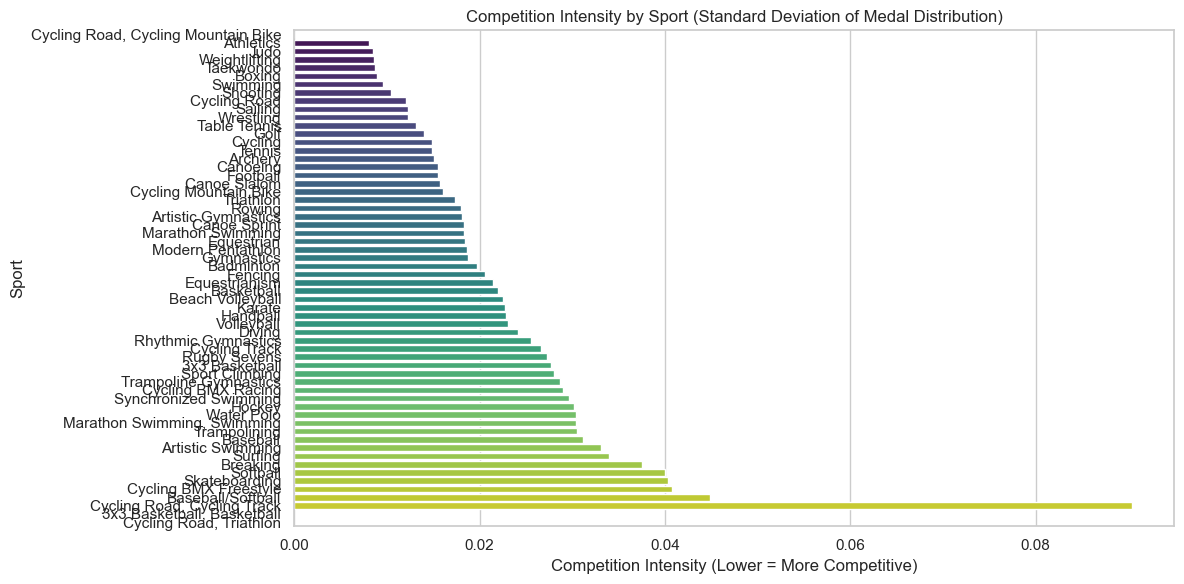

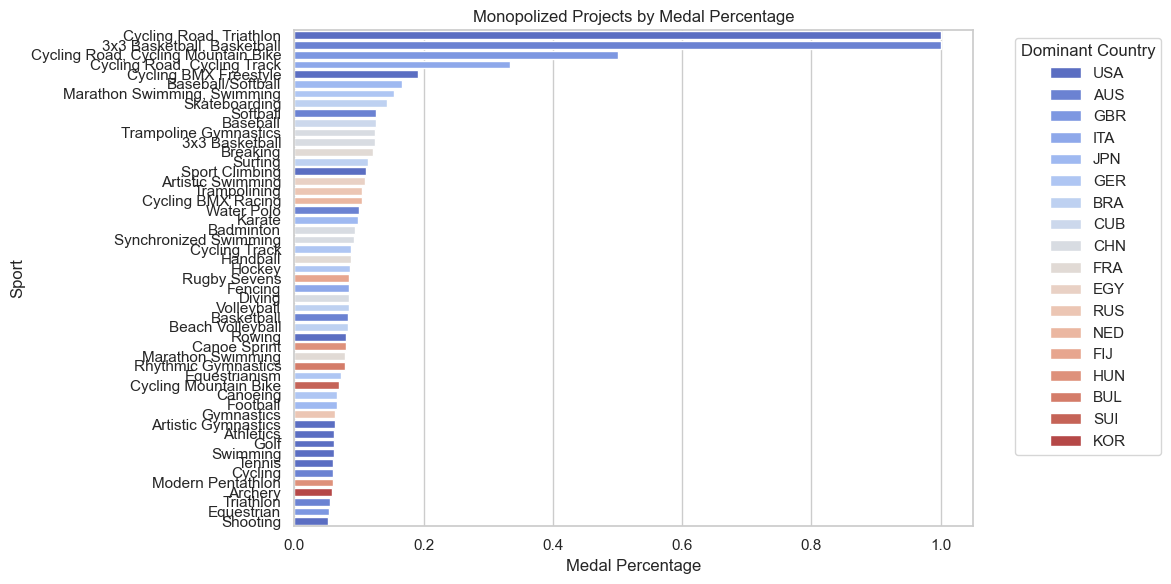

C:\Users\18154\AppData\Local\Temp\ipykernel_31028\3593435137.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


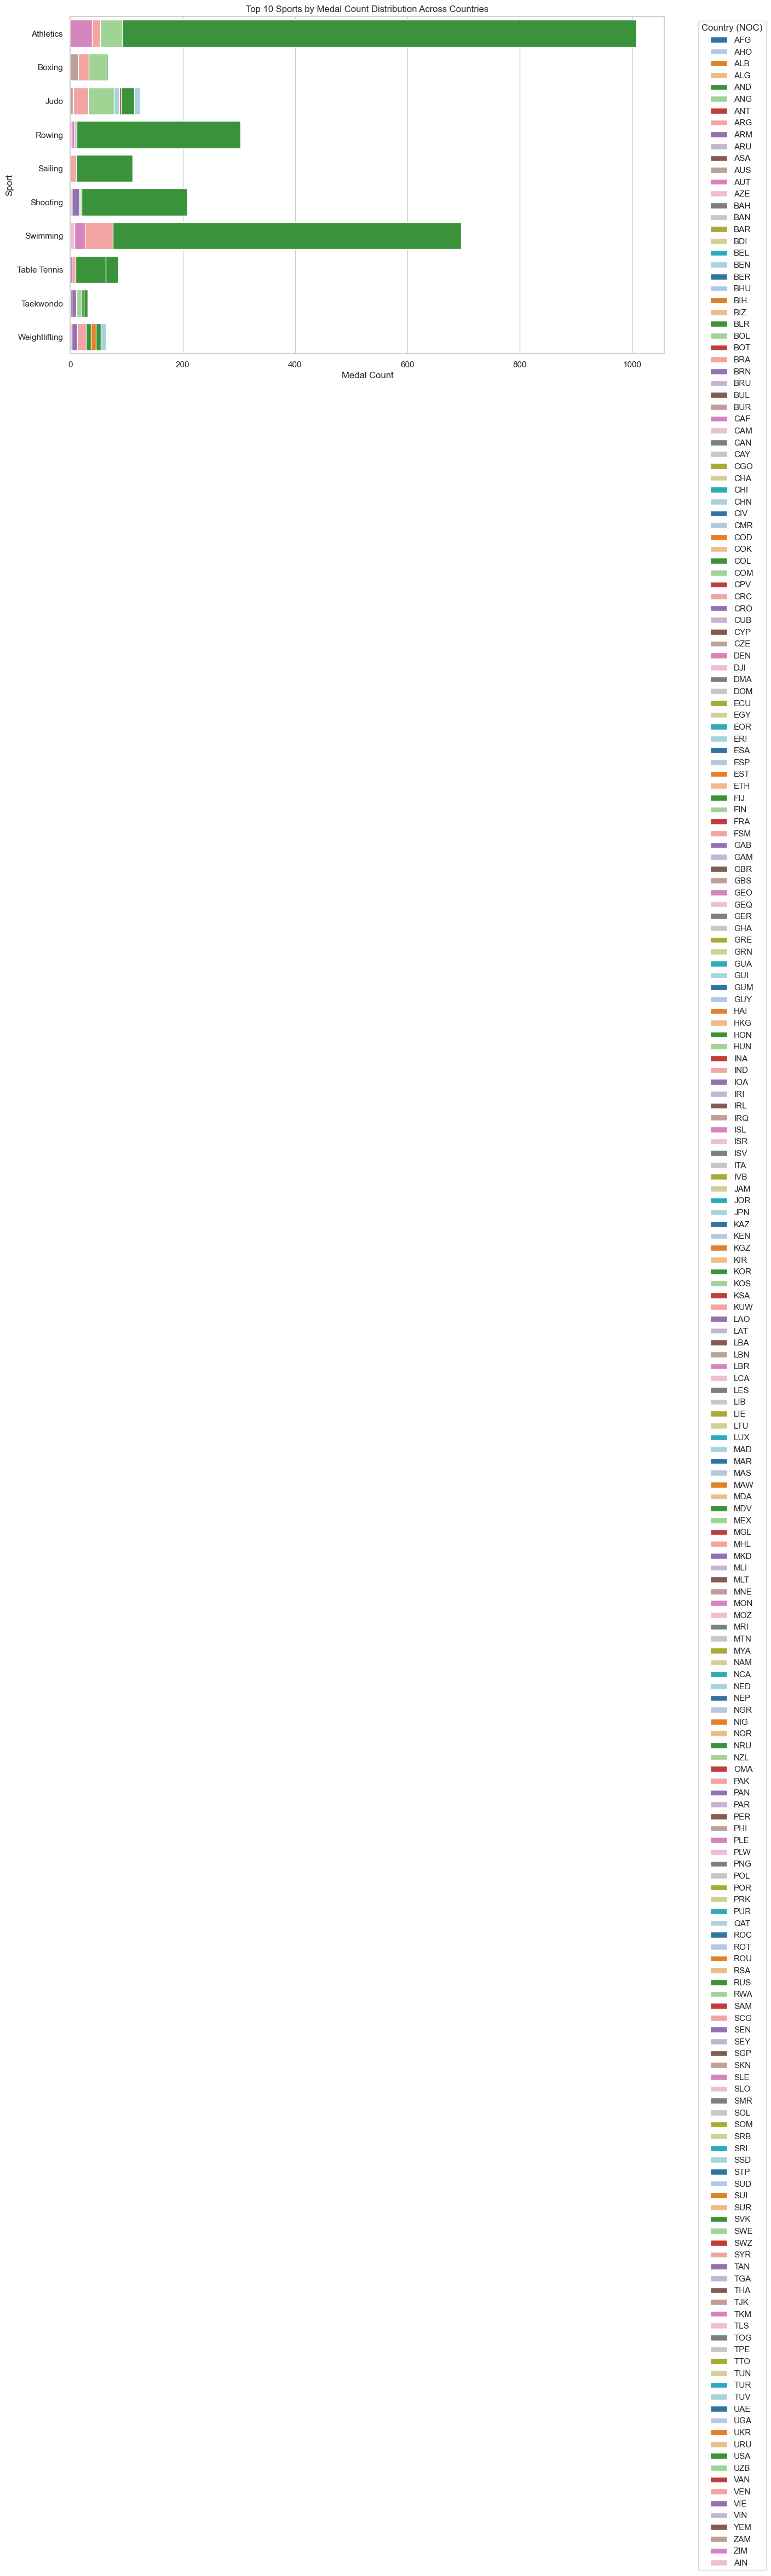

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 可视化1：竞争激烈性（标准差越小竞争越激烈）
plt.figure(figsize=(12, 6))
sns.barplot(
    data=competition_stats.sort_values(by="CompetitionIntensity", ascending=True),
    x="CompetitionIntensity",
    y="Sport",
    palette="viridis",
)
plt.title("Competition Intensity by Sport (Standard Deviation of Medal Distribution)")
plt.xlabel("Competition Intensity (Lower = More Competitive)")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()

# 可视化2：垄断性项目（按奖牌占比排序）
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monopolized_projects.sort_values(by="MedalPercentage", ascending=False),
    x="MedalPercentage",
    y="Sport",
    hue="DominantCountry",
    dodge=False,
    palette="coolwarm",
)
plt.title("Monopolized Projects by Medal Percentage")
plt.xlabel("Medal Percentage")
plt.ylabel("Sport")
plt.legend(title="Dominant Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 可视化3：各国在不同项目中的奖牌分布
top_sports = (
    project_medals["Sport"].value_counts().index[:10]
)  # 取奖牌数最多的前10个项目
top_projects = project_medals[project_medals["Sport"].isin(top_sports)]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_projects,
    x="MedalCount",
    y="Sport",
    hue="NOC",
    dodge=False,
    palette="tab20",
)
plt.title("Top 10 Sports by Medal Count Distribution Across Countries")
plt.xlabel("Medal Count")
plt.ylabel("Sport")
plt.legend(title="Country (NOC)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

通过散点图来直观展示 MedalPercentage（垄断程度）和 CompetitionIntensity（竞争激烈性）之间的关系。这有助于发现是否存在某种模式或相关性。

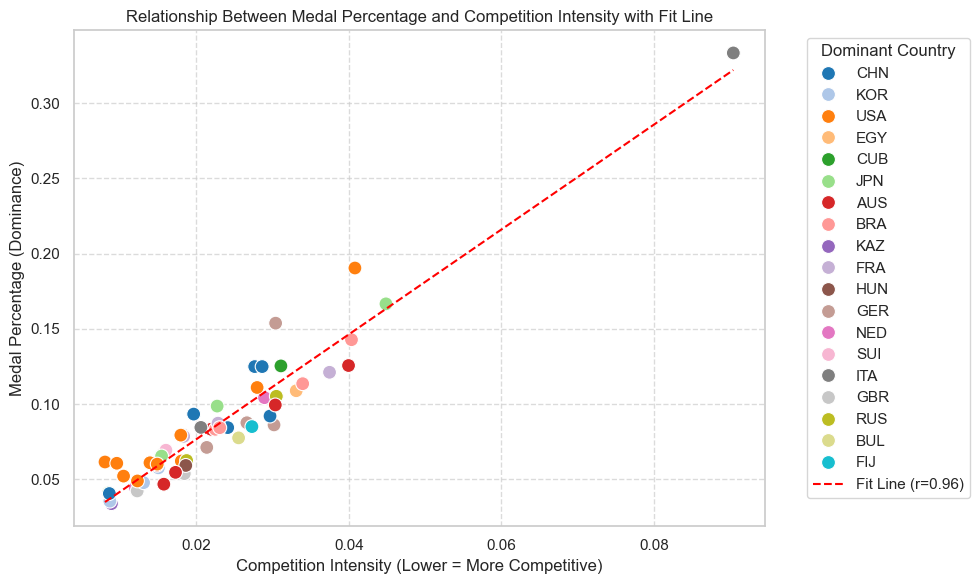

Linear Regression Results:
Slope: 3.4835
Intercept: 0.0070
R-squared: 0.9126
P-value: 8.7522e-31
Standard Error: 0.1454


In [ ]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

# 从 CSV 文件加载数据
project_analysis = pd.read_csv("project_analysis.csv")

# 移除无效数据（NaN 和无穷大）
filtered_data = project_analysis[
    project_analysis["MedalPercentage"].notna()
    & project_analysis["CompetitionIntensity"].notna()
    & (project_analysis["MedalPercentage"] < 1)
    & (project_analysis["CompetitionIntensity"] > 0)
]

# 提取过滤后的数据
x = filtered_data["CompetitionIntensity"]
y = filtered_data["MedalPercentage"]

# 重新计算线性回归
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# 绘制散点图和拟合直线
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x="CompetitionIntensity",
    y="MedalPercentage",
    hue="DominantCountry",
    palette="tab20",
    s=100,
    edgecolor="w",
)

# 绘制拟合直线
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
plt.plot(
    x_line, y_line, color="red", linestyle="--", label=f"Fit Line (r={r_value:.2f})"
)

# 图表标题和标签
plt.title(
    "Relationship Between Medal Percentage and Competition Intensity with Fit Line"
)
plt.xlabel("Competition Intensity (Lower = More Competitive)")
plt.ylabel("Medal Percentage (Dominance)")
plt.legend(title="Dominant Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# 显示图表
plt.show()

# 输出相关性结果
print(f"Linear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Standard Error: {std_err:.4f}")